In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Ler Arquivos
movies = pd.read_csv('https://raw.githubusercontent.com/Brunorm96/Dataset-Movie-Lens---QuaretenaDados-Aula-01/master/movies.csv')
rate =pd.read_csv('https://raw.githubusercontent.com/Brunorm96/Dataset-Movie-Lens---QuaretenaDados-Aula-01/master/ratings.csv')

#Adicionando as notas médias de cada filme
mean_rating = rate.groupby("movieId")["rating"].mean()
movies = movies.join(mean_rating, on="movieId")
movies = movies.rename(columns={"rating":"mean_rating"})
movies["mean_rating"] = movies["mean_rating"].round(2)

#Adicionando o número total de notas para cada filme
quant_vote = rate.groupby("movieId")["rating"].count()
movies = movies.join(quant_vote, on="movieId")
movies = movies.rename(columns={"rating":"quant_vote"})

In [2]:
movies.head()

,movieId,title,genres,mean_rating,quant_vote
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [0]:
#Função para plotar gráficos de filmes
def plot_movies(n):
  info = rate.query(f"movieId == {n}")["rating"]
  info.plot(kind="hist")
  plt.show()
  print("\n")
  info.plot.box()
  plt.show()
  return info.describe()

In [5]:
#Quantidade de aparições de cada genero
generos_aparicoes = movies["genres"].str.get_dummies(sep="|").sum().sort_values(ascending = False)
generos_aparicoes

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 1 :

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

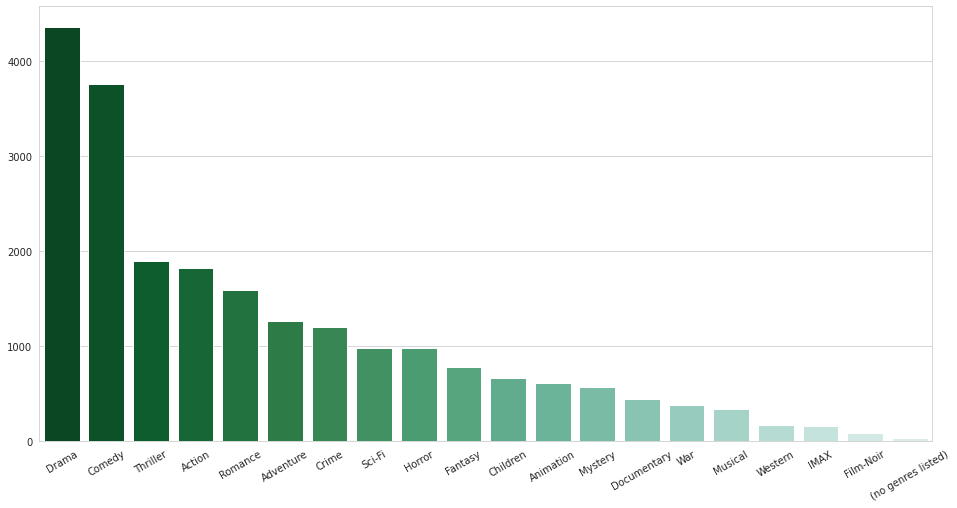

In [6]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.barplot(generos_aparicoes.index, generos_aparicoes.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(generos_aparicoes) + 4))
plt.xticks(rotation=30)
plt.show()

# Desafio 2 :


Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [0]:
movies.sort_values("mean_rating", ascending=False)[1000:1050]

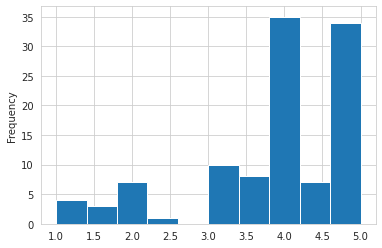

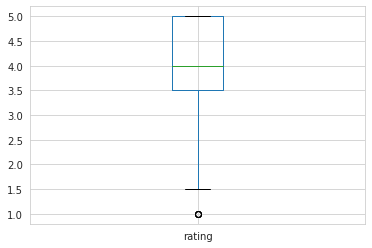

count    109.000000
mean       3.894495
std        1.103600
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [7]:
#2001 : Space Odissey
plot_movies(924)

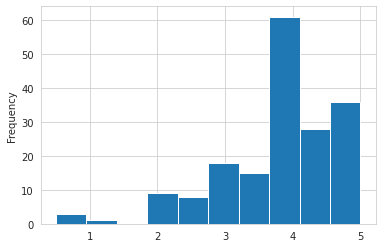

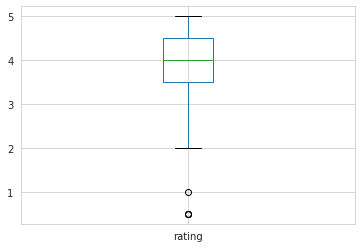

count    179.000000
mean       3.893855
std        0.955420
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [8]:
#Sixth Sense
plot_movies(2762)

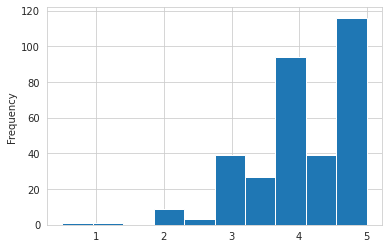

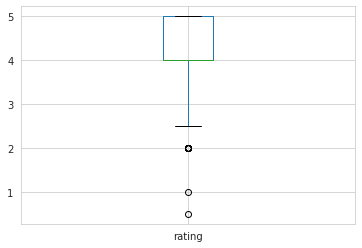

count    329.000000
mean       4.164134
std        0.831244
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [9]:
#Forest Gump
plot_movies(356)

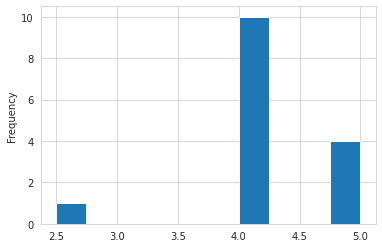

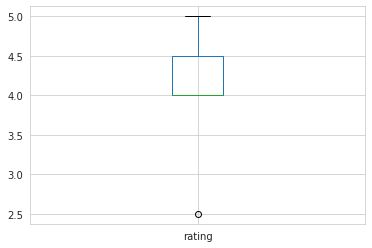

count    15.000000
mean      4.166667
std       0.645497
min       2.500000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64

In [10]:
#Malcolm X
plot_movies(3246)

# Desafio 3 :


Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
os10_mais_votados = movies.sort_values("quant_vote", ascending=False).head(10)
os10_mais_votados_id = list(os10_mais_votados["movieId"].values)
os10_mais_votados_title = list(os10_mais_votados["title"].values)

In [14]:
os10_mais_votados

,movieId,title,genres,mean_rating,quant_vote
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


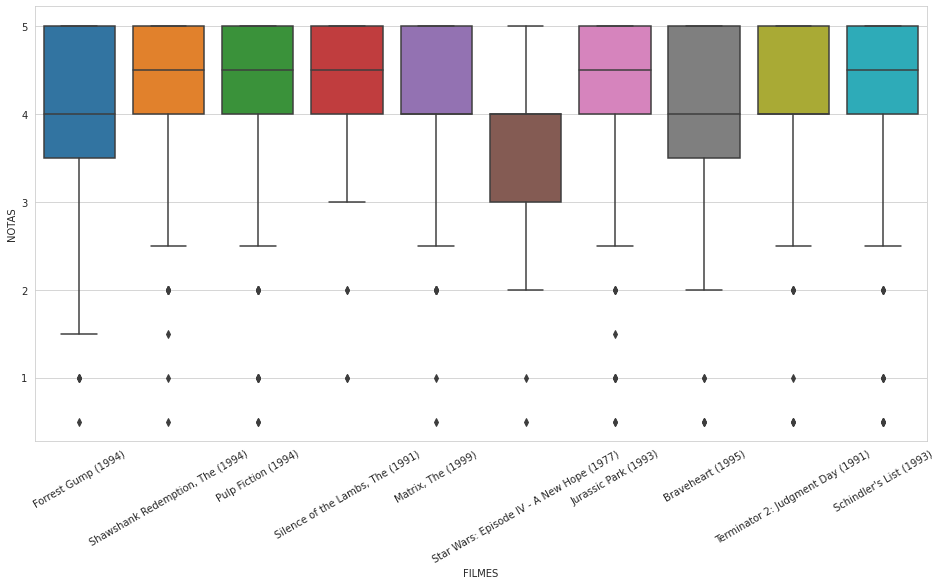

In [13]:
plt.figure(figsize=(16,8))
sx = sns.boxplot(data=rate.query(f"movieId in {os10_mais_votados_id}"), x="movieId", y="rating")
sx.set_xticklabels(os10_mais_votados_title)
plt.xticks(rotation=30)
plt.xlabel("FILMES")
plt.ylabel("NOTAS")
plt.show()

# Desafio 4 :

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [0]:
#União dos dois DataFrames("movies" e "rate")
merge_rate_movies = pd.merge(right=movies, left=rate, how='inner')

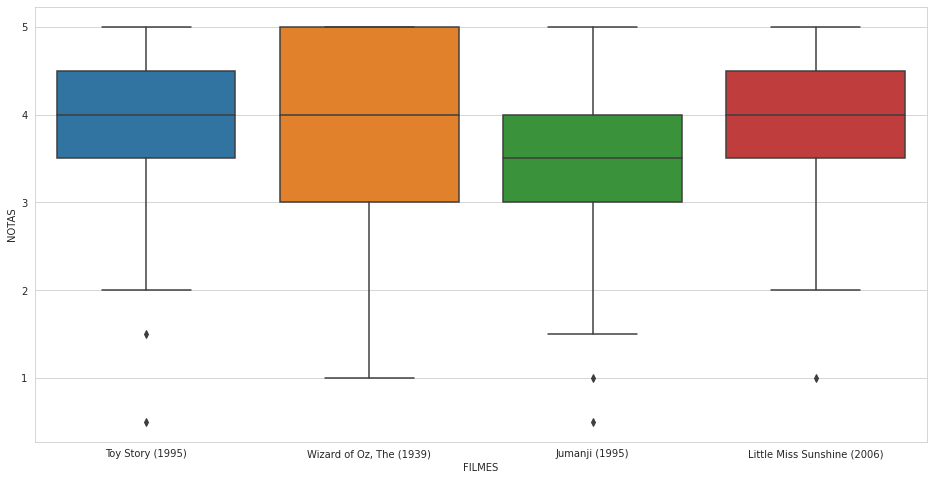

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(data=merge_rate_movies.query("movieId in [1,2,919,46578]"), x="title", y="rating")
plt.xticks(rotation=0)
plt.xlabel("FILMES")
plt.ylabel("NOTAS")
plt.show()

# Desafio 5 :

Calcular moda, média e mediana dos filmes.

In [0]:
#Adicionando as medianas das notas ao DF "movies"
median_rate = rate.groupby("movieId")["rating"].median()
movies = movies.join(median_rate, on="movieId")
movies = movies.rename(columns={"rating":"median_rate"})


In [0]:
#Adicionando as modas das notas ao DF "movies"
mode_rate = rate.groupby("movieId")["rating"].agg(pd.Series.mode)
movies = movies.join(mode_rate, on = "movieId")
movies = movies.rename(columns={"rating":"mode_rate"})

In [19]:
movies.head()

,movieId,title,genres,mean_rating,quant_vote,median_rate,mode_rate
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0,3.0,3


In [0]:
def analise_estatistica(n):
  #'iloc' encontra o valor da posição que foi passada 
  titulo = movies.query(f"movieId == {n}").iloc[0, 1]
  media = movies.query(f"movieId == {n}").iloc[0, 3]
  mediana = movies.query(f"movieId =={n}").iloc[0, 5]
  moda = movies.query(f"movieId == {n}").iloc[0, 6]
  print(f"Filme: {titulo}")
  print()
  print(f"Média: {media}")
  print(f"Mediana: {mediana}")
  print(f"Moda: {moda}")
  print()

In [21]:
analise_estatistica(1)
analise_estatistica(2)

Filme: Toy Story (1995)

Média: 3.92
Mediana: 4.0
Moda: 4.0

Filme: Jumanji (1995)

Média: 3.43
Mediana: 3.5
Moda: 4.0



# Desafio 6 :

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
def plot_movies_2(n):
  info = rate.query(f"movieId == {n}")["rating"]
  plt.figure(figsize=(16,8))
  ax = plt.subplot(1, 2, 1)
  info.plot(kind="hist")
  print(movies.query(f"movieId == {n}").iloc[0, 1])
  ax1 = plt.subplot(1, 2, 2)
  info.plot.box()
  plt.show()

Toy Story (1995)


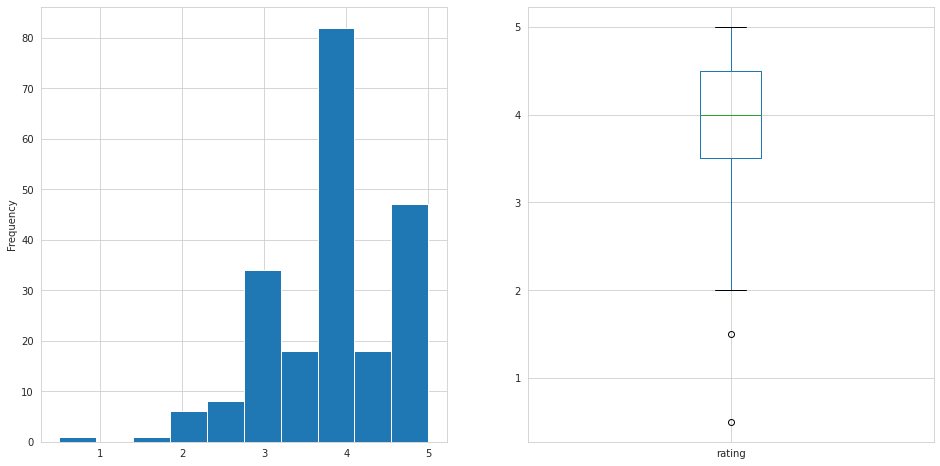

In [29]:
plot_movies_2(1)

# Desafio 7 :

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [30]:
movies_year = movies[["title", "mean_rating"]]
movies_year["year"] = movies_year["title"].str.extract("\((\d{4})\)")
movies_year.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,mean_rating,year
0,Toy Story (1995),3.92,1995
1,Jumanji (1995),3.43,1995
2,Grumpier Old Men (1995),3.26,1995
3,Waiting to Exhale (1995),2.36,1995
4,Father of the Bride Part II (1995),3.07,1995


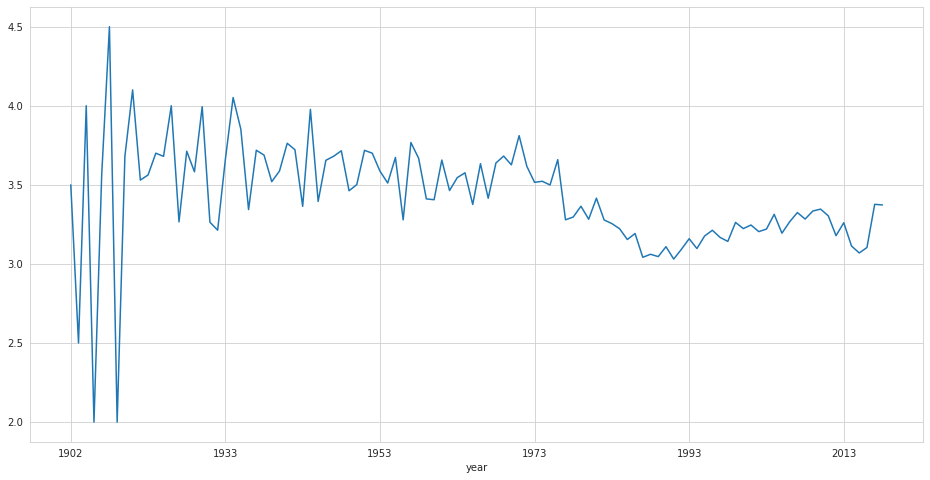

In [31]:
mean_rate_by_year = movies_year.groupby("year")["mean_rating"].mean()
plt.figure(figsize=(16,8))
mean_rate_by_year.plot()